# Create Ordnance Survey British National Grid Grids Examples

* The [`osbng`](https://github.com/OrdnanceSurvey/osbng-py) Python package supports geospatial grid indexing and interaction with Ordnance Survey's British National Grid (BNG) index system.
* The `osbng.grids` module provides functionality to generate BNG grid square data within specified bounds. This notebook provides examples of creating data at a range of resolutions and accross custom bounds.

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import shape

from osbng.bng_reference import BNGReference
from osbng.grids import BNG_BOUNDS, bbox_to_bng_iterfeatures, bng_grid_100km

## `osbng.bng_reference.BNGReference`

* The `osbng.bng_reference.BNGReference` object encapsulates a BNG reference and the associated grid square geometry. 
* The `BNGReference` object can be converted to a GeoJSON-like Feature object using the [`__geo_interface__`](https://gist.github.com/sgillies/2217756) property.

In [6]:
BNGReference(bng_ref_string="SU").__geo_interface__

{'type': 'Feature',
 'properties': {'bng_ref': 'SU'},
 'geometry': {'type': 'Polygon',
  'coordinates': (((500000.0, 100000.0),
    (500000.0, 200000.0),
    (400000.0, 200000.0),
    (400000.0, 100000.0),
    (500000.0, 100000.0)),)}}

## `osbng.grids`

* Grid square data covering the BNG index system bounds is provided with the `osbng` package as iterators at 100km, 50km, 10km, 5km and 1km resolutions.
* See `bng_grid_<resolution>` in `osbng.grids` module.
* Each iterator supports the generation of `BNGReference` objects as GeoJSON-like Features using the `__geo_interface__` protocol.
* The `__geo_interface__` protocol used to represent `BNGReference` objects supports integration with Python geospatial libraries and tools such as [Shapely](https://github.com/shapely/shapely) and [GeoPandas](https://github.com/geopandas/geopandas).

In [7]:
# Convert the iterator to a list to generate the Features
bng_grid_100km_list = list(bng_grid_100km)

In [8]:
# Return the first Feature
print(bng_grid_100km_list[0])

{'type': 'Feature', 'properties': {'bng_ref': 'SV'}, 'geometry': {'type': 'Polygon', 'coordinates': (((100000.0, 0.0), (100000.0, 100000.0), (0.0, 100000.0), (0.0, 0.0), (100000.0, 0.0)),)}}


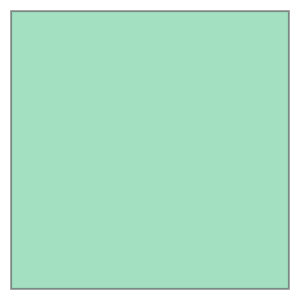

In [9]:
# Create a Shapely Geometry object from a BNGReference object Feature
shape(bng_grid_100km_list[0]["geometry"])

In [10]:
# Create a GeoPandas GeoDataFrame from an iterator or list of BNGReference object Features
# This example uses the list as the iterator has been consumed above
# Set the coordinate reference system to British National Grid (EPSG: 27700)
# https://epsg.io/27700
gdf = gpd.GeoDataFrame.from_features(bng_grid_100km_list, crs=27700)

gdf.head()

,geometry,bng_ref
0,"POLYGON ((100000 0, 100000 100000, 0 100000, 0...",SV
1,"POLYGON ((200000 0, 200000 100000, 100000 1000...",SW
2,"POLYGON ((300000 0, 300000 100000, 200000 1000...",SX
3,"POLYGON ((400000 0, 400000 100000, 300000 1000...",SY
4,"POLYGON ((500000 0, 500000 100000, 400000 1000...",SZ


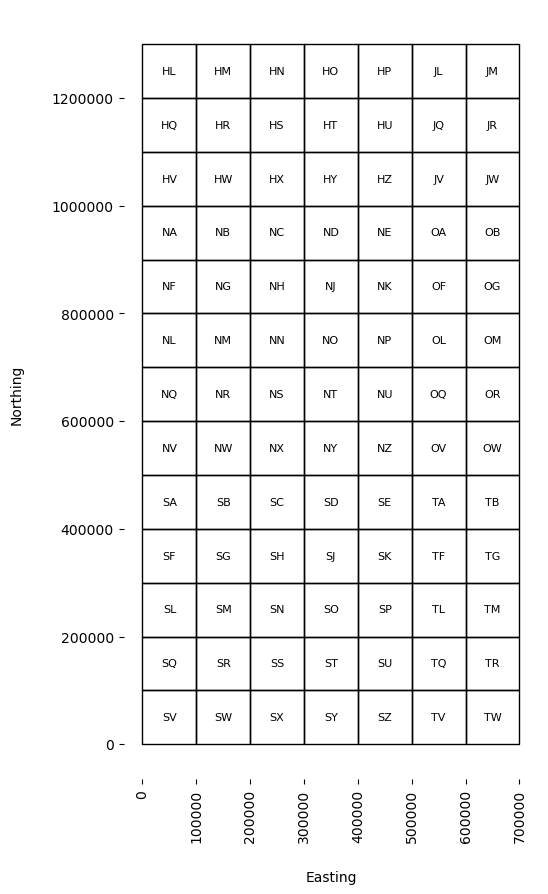

In [11]:
# Create matplotlib figure and axis
f, ax = plt.subplots(figsize=(10, 10))

# Plot the grid squares GeoDataFrame with black borders and no fill
gdf.plot(ax=ax, edgecolor="black", facecolor="none")

# Add feature labels
for idx, row in gdf.iterrows():
    ax.text(
        row["geometry"].centroid.x,
        row["geometry"].centroid.y,
        row["bng_ref"],
        fontsize=8,
        fontweight="light",
        ha="center",
        va="center",
    )

# Set axis labels
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")

# Remove the figure frame but keep the ticks and tick labels
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Disable scientific notation for both axes
ax.ticklabel_format(style="plain", axis="both")

# Rotate x axis tick labels by 90 degrees anticlockwise
plt.xticks(rotation=90)

# Add whitespace between x and y axis labels and tick labels
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

## `osbng.grids.BNG_BOUNDS`

* `osbng.grids.BNG_BOUNDS` provides the BNG index system bounds as bounding box coordinates (xmin, ymin, xmax, ymax).
* The `osbng.grids.bbox_to_bng_iterfeatures` function returns an iterator of `BNGReference` objects represented using a GeoJSON-like mapping within specified bounds at a specified resolution. This function can be used to generate BNG grid data at different resolutions over custom bounds.

In [12]:
BNG_BOUNDS

(0, 0, 700000, 1300000)

In [13]:
# Custom bounding box coordinates
# (x_min, y_min, x_max, y_max)
bbox = (529476, 179654, 532170, 181116)

# Generate BNGReference object Features covering the custom bounds at 100m resolution
bng_grid_100m_custom_list = list(bbox_to_bng_iterfeatures(*bbox, "100m"))

# First 5 Features
print(bng_grid_100m_custom_list[:5])

[{'type': 'Feature', 'properties': {'bng_ref': 'TQ294796'}, 'geometry': {'type': 'Polygon', 'coordinates': (((529500.0, 179600.0), (529500.0, 179700.0), (529400.0, 179700.0), (529400.0, 179600.0), (529500.0, 179600.0)),)}}, {'type': 'Feature', 'properties': {'bng_ref': 'TQ295796'}, 'geometry': {'type': 'Polygon', 'coordinates': (((529600.0, 179600.0), (529600.0, 179700.0), (529500.0, 179700.0), (529500.0, 179600.0), (529600.0, 179600.0)),)}}, {'type': 'Feature', 'properties': {'bng_ref': 'TQ296796'}, 'geometry': {'type': 'Polygon', 'coordinates': (((529700.0, 179600.0), (529700.0, 179700.0), (529600.0, 179700.0), (529600.0, 179600.0), (529700.0, 179600.0)),)}}, {'type': 'Feature', 'properties': {'bng_ref': 'TQ297796'}, 'geometry': {'type': 'Polygon', 'coordinates': (((529800.0, 179600.0), (529800.0, 179700.0), (529700.0, 179700.0), (529700.0, 179600.0), (529800.0, 179600.0)),)}}, {'type': 'Feature', 'properties': {'bng_ref': 'TQ298796'}, 'geometry': {'type': 'Polygon', 'coordinates': (

In [14]:
# Create a GeoPandas GeoDataFrame from the 100m BNGReference object Features
bng_grid_100m_custom_gdf = gpd.GeoDataFrame.from_features(bng_grid_100m_custom_list, crs=27700)

bng_grid_100m_custom_gdf.head()

,geometry,bng_ref
0,"POLYGON ((529500 179600, 529500 179700, 529400...",TQ294796
1,"POLYGON ((529600 179600, 529600 179700, 529500...",TQ295796
2,"POLYGON ((529700 179600, 529700 179700, 529600...",TQ296796
3,"POLYGON ((529800 179600, 529800 179700, 529700...",TQ297796
4,"POLYGON ((529900 179600, 529900 179700, 529800...",TQ298796


In [15]:
# Generate BNGReference object Features covering the same custom bounds at 1km resolution
# Provides context for the 100m resolution grid squares
bng_grid_1km_custom_list = list(bbox_to_bng_iterfeatures(*bbox, "1km"))

# Create a GeoPandas GeoDataFrame from the 1km BNGReference object Features
bng_grid_1km_custom_gdf = gpd.GeoDataFrame.from_features(bng_grid_1km_custom_list, crs=27700)

bng_grid_1km_custom_gdf.head()

,geometry,bng_ref
0,"POLYGON ((530000 179000, 530000 180000, 529000...",TQ2979
1,"POLYGON ((531000 179000, 531000 180000, 530000...",TQ3079
2,"POLYGON ((532000 179000, 532000 180000, 531000...",TQ3179
3,"POLYGON ((533000 179000, 533000 180000, 532000...",TQ3279
4,"POLYGON ((530000 180000, 530000 181000, 529000...",TQ2980


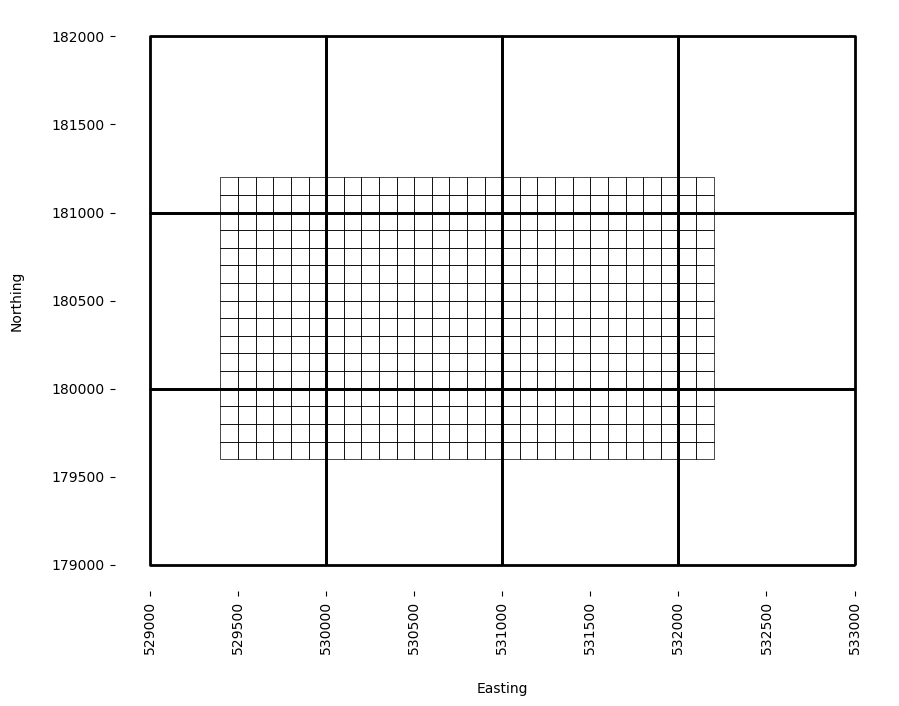

In [16]:
# Create matplotlib figure and axis
f, ax = plt.subplots(figsize=(10, 10))

# Plot the grid squares GeoDataFrames with black borders and no fill
bng_grid_1km_custom_gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=2)
bng_grid_100m_custom_gdf.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5)

# Set axis labels
ax.set_xlabel("Easting")
ax.set_ylabel("Northing")

# Remove the figure frame but keep the ticks and tick labels
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Disable scientific notation for both axes
ax.ticklabel_format(style="plain", axis="both")

# Rotate x axis tick labels by 90 degrees anticlockwise
plt.xticks(rotation=90)

# Add whitespace between x and y axis labels and tick labels
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20